# AdaBoost

## The Data

<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Goal

**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.


Because Tree based methods have great capabilities to report feature importance.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mushrooms.csv')

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# EDA

As almost every features are categorical, we can't expore numerical numbers like mean, etc.
What we can explore if how often this color of mushroom shown up as Edible or Poisonous.

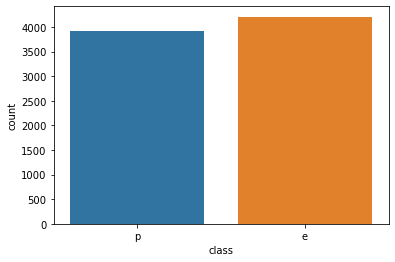

In [7]:
# check the balance of the classes
sns.countplot(data=df, x=df['class']);

Seem like we have pretty balanced dataset.

In [9]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


We can see the unique numbers for each feature, top point, etc.

# Sort values by uniqueness

We can see which features have high and low uniqueness

In [14]:
unique_features = df.describe().transpose().reset_index().sort_values(by='unique', ascending=False)

unique_features

,index,count,unique,top,freq
9,gill-color,8124,12,b,1728
3,cap-color,8124,10,n,2284
20,spore-print-color,8124,9,w,2388
5,odor,8124,9,n,3528
15,stalk-color-below-ring,8124,9,w,4384
14,stalk-color-above-ring,8124,9,w,4464
22,habitat,8124,7,d,3148
1,cap-shape,8124,6,x,3656
21,population,8124,6,v,4040
19,ring-type,8124,5,p,3968


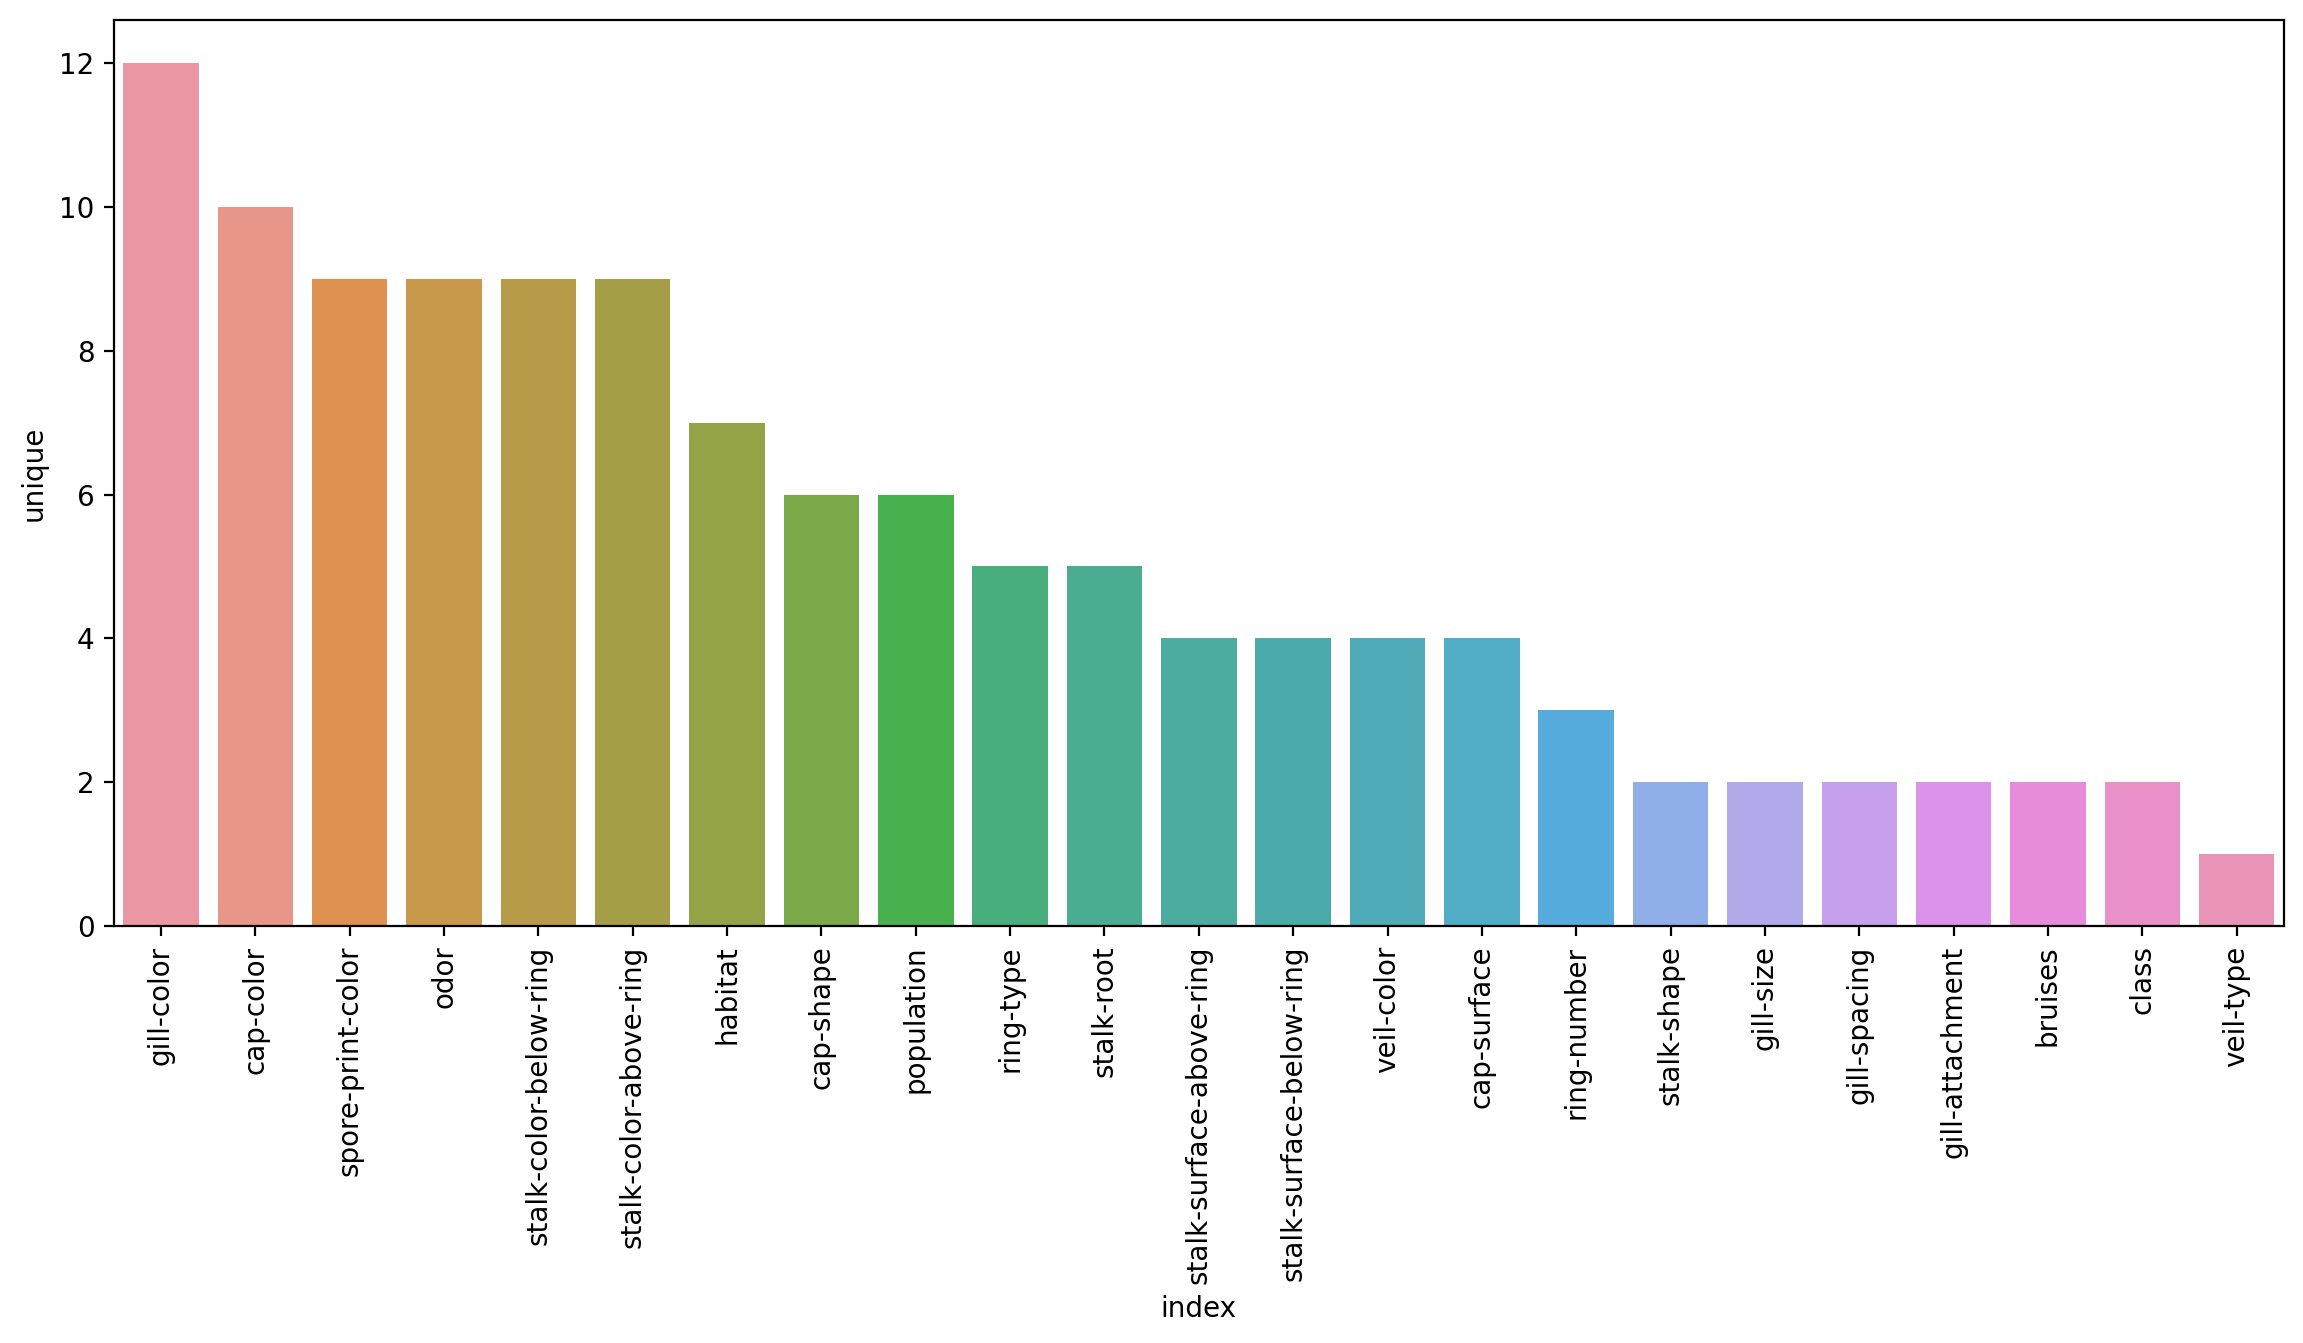

In [22]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=unique_features, x='index', y='unique');
plt.xticks(rotation=90);

# Categorical Encoding

In [28]:
X = df.drop('class', axis=1)
y = df['class']

In [29]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Modeling

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In below, we create a very simple Stump. Basically saying n_estimators=1, **learn to split on only 1 feaure and one feature alone.**

In [35]:
model = AdaBoostClassifier(n_estimators=1) 

In [36]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

# Evaluation

In [37]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [38]:
predictions = model.predict(X_test)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



## Feature Importances


In [46]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

As we can see from the feature importance, we can see one `1` value out of all.

It makes sense as our stump is techincally a single stump and it gonna say one feature is important.
Because it is split on single feature.

We can figure out which feature it is by using index.

In [50]:
model.feature_importances_.argmax()

# this return the index of the maximum value (1 will the max value among the bunches of zeros)

22

In [52]:
X.columns[22]

'odor_n'

Based on the single stump, our model think `odor_n: No Odor` is the most important feature and predict pretty impressive accuracy.

In [56]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

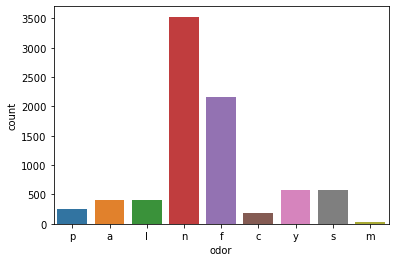

In [59]:
# we can check the visualizaiton on across different odors mushrooms.
sns.countplot(data=df, x='odor');

We can see that `no odor mushroom` has the highest frequency and there are various type of mushroom with other odors.

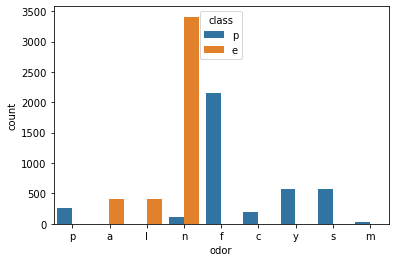

In [60]:
sns.countplot(data=df, x='odor', hue='class');

If we split by `Class: Edible or Poisonous`, we can see most of `No Odor` are Edible. 

Thus, if we are setting up guidlines for people about to pick mushrooms, we can say
+ you have to check one thing: go ahead and pick the mush room and then smell it.
+ if it has no discernable odor, then most likely it's propably edible.

Of course this is not a perfect guidline. because there are quite a few poisonous mushrooms with no odor.

# Analyzing performance as more weak learners are added (kinda Elbow method)

There are 95 features, so we can test out stump on using different sets of using various number of features.

In [63]:
len(X.columns)

95

In [64]:
from sklearn.metrics import accuracy_score

error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, predictions)
    error_rates.append(error)

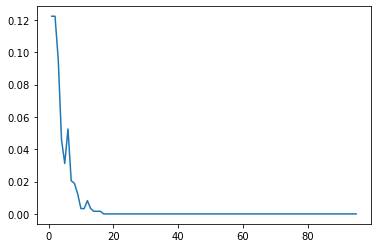

In [65]:
# visualize the error rates
plt.plot(range(1, 96), error_rates)

We can see that initial error rate is around 12. As we add in more stumps, error rates start to drop.

There is a little bit of spike, however it settles a while later.

We can see around 20 stumps, there is no so much improvement after that.

Also we need to take note that as we add in more stumps, previously identify `n_oder` will not be the most important feature because coefficient of each stumps will be constantly adjusted.

In [67]:
# check 96 n estimator of the last trained
model

AdaBoostClassifier(n_estimators=95)

In [68]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [71]:
features = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])
features

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


## Important Featues that model is actually considering

In [78]:
imp_features = features[features['Importance'] > 0].sort_values('Importance', ascending=False)

imp_features

,Importance
spore-print-color_w,0.168421
population_c,0.105263
gill-spacing_w,0.094737
gill-size_n,0.094737
odor_n,0.063158
stalk-surface-above-ring_k,0.063158
stalk-color-below-ring_n,0.063158
bruises_t,0.052632
spore-print-color_r,0.052632
population_v,0.042105


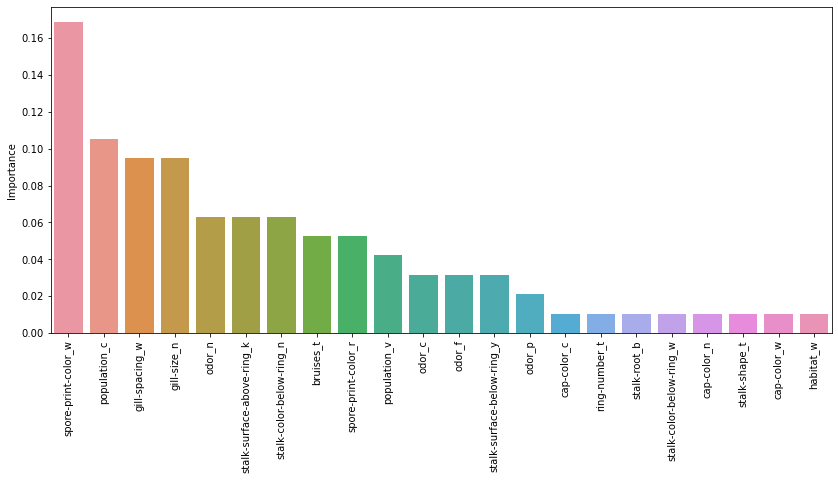

In [86]:
plt.figure(figsize=(14, 6))
sns.barplot(data=imp_features, x=imp_features.index, y='Importance');
plt.xticks(rotation=90);

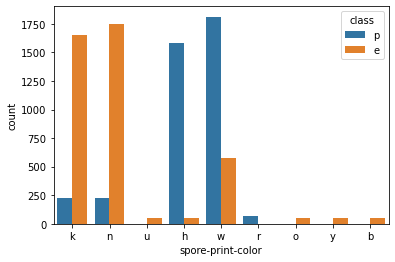

In [90]:
sns.countplot(data=df, x='spore-print-color', hue='class');

Interesting to see how the importance of the features shift as more are allowed to be added in! 

But remember these are all weak learner stumps, and feature importance is available for all the tree methods!